# Midterm 1
## Instructions
Use `sympy` to work the problems in this notebook, then submit via pull request. You may use any notebooks we have built over the course of the semester as reference material. Try to format your answers as readably as possible.

## `sympy` basics
### Problem 1

a) Solve $$ ax^2 + bx +c = 0$$ for $x$.


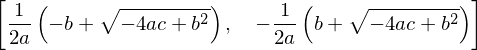

In [1]:
import sympy as sp
sp.init_printing()


a,b,c,x = sp.symbols("a b c x")
solset = sp.solve(a*x**2 + b*x + c, x)
solset


b) Substitute $a=4$, $b=1$ and $c=-3$ into your answers to the previous question, and have `sympy` give you numerical results.

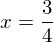

In [2]:
sp.Eq(x, solset[0].subs({a:4, b:1, c:-3}))

In [3]:
sp.Eq(x, solset[1].subs({a:4, b:1, c:-3}))

---

## Vector basics
### Problem 2
Given the vectors $$\mathbf{A} = \left(\begin{array}{c}1\\3\\-2\end{array}\right) \qquad \text{and} \qquad
\mathbf{B}= \left(\begin{array}{c}4\\1\\5\end{array}\right),$$
what are

a) $\mathbf{A} + \mathbf{B}$?

In [4]:
from sympy import vector

C = vector.CoordSys3D('', vector_names=['x', "y", "z"],
                     variable_names=['x', "y", "z"])

xhat = C.i
yhat = C.j
zhat = C.k
x = C.x
y = C.y
z = C.z



In [5]:
A = 1*xhat + 3*yhat -2*zhat
B = 4*xhat + 1*yhat +5*zhat

A+B

b) $\mathbf{A}\cdot\mathbf{B}$?

In [6]:
A.dot(B)

c) $\mathbf{A}\times\mathbf{B}$?

In [7]:
A.cross(B)

d) $\mathbf{A} \cdot \left(\mathbf{B} - \left(\mathbf{A}\cdot\mathbf{B}\right)\mathbf{A}\right)$

In [8]:
A.dot(B-(A.dot(B)*A))

---

## Derivatives

### Problem 3
Given the functions $$\phi = xy - 3z^2$$ and $$\mathbf{v} = zx\hat{\mathbf{x}} + yz\hat{\mathbf{y}} - xy\hat{\mathbf{z}},$$

what are

a) $\nabla\phi$?

In [9]:
phi = x*y-3*z**2
v = z*x*xhat + y*z*yhat - x*y*zhat

vector.gradient(phi)

b) $\nabla \cdot \left(\phi \mathbf{v}\right) $

In [10]:
vector.divergence(phi*v)

c) $\nabla\times \mathbf{v}$

In [11]:
vector.curl(v)

d) $(\nabla\cdot\mathbf{v}) (\nabla\phi\times\hat{\mathbf{z}})$

In [12]:
vector.divergence(v)*vector.gradient(phi).cross(zhat)

---

## Integrals

### Problem 4
a) For the $\phi$ defined above, evaluate $$\iiint \phi \,d\tau $$ over the tetrahedron with vertices at $(0,0,0)$, $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.

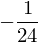

In [13]:
sp.integrate(sp.integrate(sp.integrate( phi, (x, 0, 1-y-z)),
                         (y,0,1-z)),
            (z,0,1))

b) Evaluate $$\int \mathbf{v}\cdot\,d\mathbf{l}$$ along the path $(1,1,1) \rightarrow (1,1,0) \rightarrow (0,0,0)$.

In [14]:
sp.integrate(-v.dot(zhat).subs({x:1,y:1}), (z, 1, 0)) + sp.integrate(-v.dot(xhat+yhat).subs({y:x, z:0}), (x,1,0))

---

## Curvilinear coordinates

### Problem 5
Verify the divergence theorem for the function 
$$\mathbf{w} = r^3 \cos\theta\sin\phi\,\hat{\mathbf{r}} + {\sin\theta\over r} \hat{\boldsymbol{\theta}}$$ 

on the volume (in spherical coordinates) 
$$\begin{eqnarray} a &\le r &\le b \\ 0 & \le \theta &\le \pi/6 \\ \pi/4 &\le \phi &\le \pi\end{eqnarray}$$ 

In [36]:
S = vector.CoordSys3D('', vector_names=['r', "\\theta", "\\phi"],
                     variable_names=['r', "\\theta", "\\phi"])
S._connect_to_standard_cartesian('spherical')

r = S.x
theta = S.y
phi = S.z

rhat = S.i
thetahat = S.j
phihat = S.k

w = r**3*sp.cos(theta)*sp.sin(phi)*rhat + r*sp.sin(theta)* thetahat
w

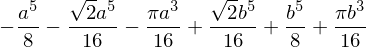

In [39]:
a,b = sp.symbols('a b')
divw = vector.divergence(w)

volume_integral = sp.integrate(sp.integrate(sp.integrate(divw*r**2*sp.sin(theta), 
                                                         (r,a,b) ),
                                           (theta,0,sp.pi/6)),
                              (phi,sp.pi/4,sp.pi))
volume_integral

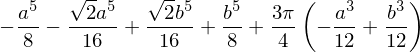

In [40]:
inner = -sp.integrate(sp.integrate((w.dot(rhat)*r**2*sp.sin(theta)).subs(r, a), (theta, 0, sp.pi/6)), (phi, sp.pi/4, sp.pi))
outer = sp.integrate(sp.integrate((w.dot(rhat)*r**2*sp.sin(theta)).subs(r, b), (theta, 0, sp.pi/6)), (phi, sp.pi/4, sp.pi))
# no top because it's a point
bottom = sp.integrate(sp.integrate((w.dot(thetahat)*r*sp.sin(theta)).subs(theta, sp.pi/6), (r, a, b)), (phi, sp.pi/4, sp.pi))
left = -sp.integrate(sp.integrate((w.dot(phihat)*r).subs(phi, sp.pi/4), (r, a, b)), (theta, 0, sp.pi/6))
right = sp.integrate(sp.integrate((w.dot(phihat)*r).subs(phi, sp.pi), (r, a, b)), (theta, 0, sp.pi/6))

surface_integral = inner + outer + left + right + bottom
surface_integral

In [41]:
surface_integral == volume_integral

False

In [42]:
sp.simplify(volume_integral - surface_integral)